# House Sales in King County, USA - Predictive Analytics Model

##***Kindly avoid editing this file to maintain this version for everyone. Please try to save your own copy of the file.***

The aim of this project is to develop a Linear Regression Model to predict house prices before their sale.

The data is drawn from house sales in King County, USA from the year 2014 to 2015.

The dataset has 19 columns and 21,613 rows.
 

 # Importing Libraries
 These are libraries necessary for data analysis, ploting and machine learning algorithms for predictive analytics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  
from math import sqrt
from sklearn.metrics import mean_squared_error
import mpl_toolkits
from sklearn.ensemble import GradientBoostingRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the dataset
Source: [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/23194)

More details on the dataset and its columns can be found [here.](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)

In [ ]:
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
# The dataset file will have to exist in your Google Drive first

#follow the instruction below on the Share ID
downloaded = drive.CreateFile({'id':'replace this text with Google Drive Share ID of the file you want to upload'}) 
downloaded.GetContentFile('kc_house_data.csv')  

#3. Read file as panda dataframe
import pandas as pd
data = pd.read_csv('kc_house_data.csv') 

In [ ]:
# Alternatively, you can upload the file on Colab but it is temporary as per the existing session, so you'd have to upload it again after reconnecting.
# You can use the 'Files' menu with the file icnon on your left and select 'Upload' to upload the dataset.

#Use the code below to import the dataset

import pandas as pd
data = pd.read_csv('kc_house_data.csv') 

# Exploratory Data Analysis
  The purpose of EDA is for showing us what the data can tell us before building or hypothesis testing task.
  
This helps in uderstanding the dataset and assist in data cleaning by identifying outlier, filling null entries and feature engineering (creation of new variables from existing variables).

In [ ]:
#Display the first 10 records in the dataset
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#Display a concise summary of the dataset
#There are 21613 records in the dataset. Each column has exactly 21613 entries indicating there are no null entries.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of the dataset’s distribution.

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Plots

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables.

This correalation matrix uses 'price', which we want to predict, as the target (dependent) variable.

The coeffiecients indictate the degree correlation of the independent variables against 'price'.

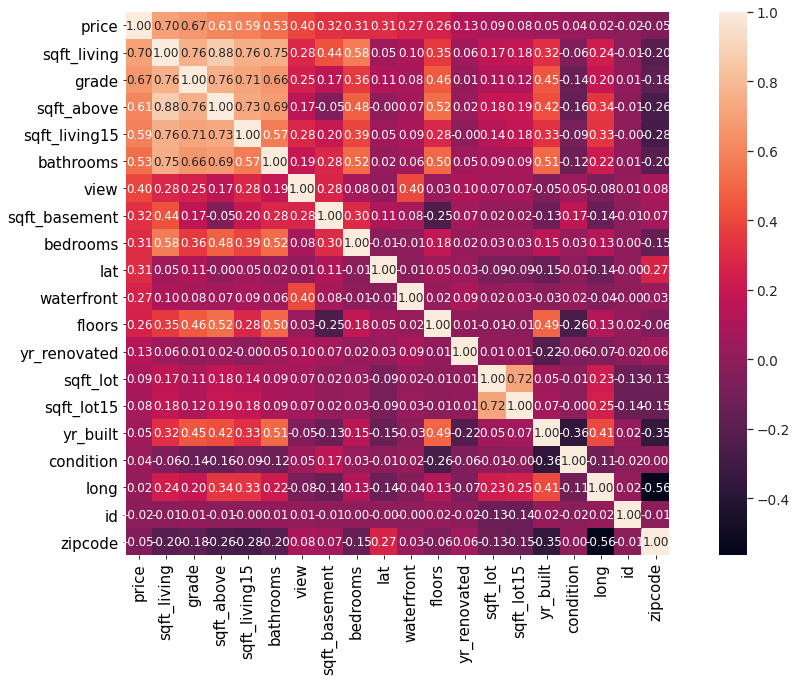

In [ ]:
corrmat = data.corr()
cols = corrmat.nlargest(21, 'price')['price'].index #specify number of columns to display i.e 21
f, ax = plt.subplots(figsize=(18, 10)) #size of matrix
cm = np.corrcoef(data[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0, size=15)
plt.xticks(rotation=90, size=15)
#plt.title("Correlation Matrix",style='oblique', size= 20)

plt.show()

### Scatter Plots
A scatter plot plots a graph of two variables where the pattern of the resulting points reveal any correlation present.

Scatter plots were used here to identify if there is a linear correlation betweeen indepent variable and price.

A line of best fit was also included in some plots to indicate the best linear trend.

Text(0.5, 1.0, 'Price v. Grade')

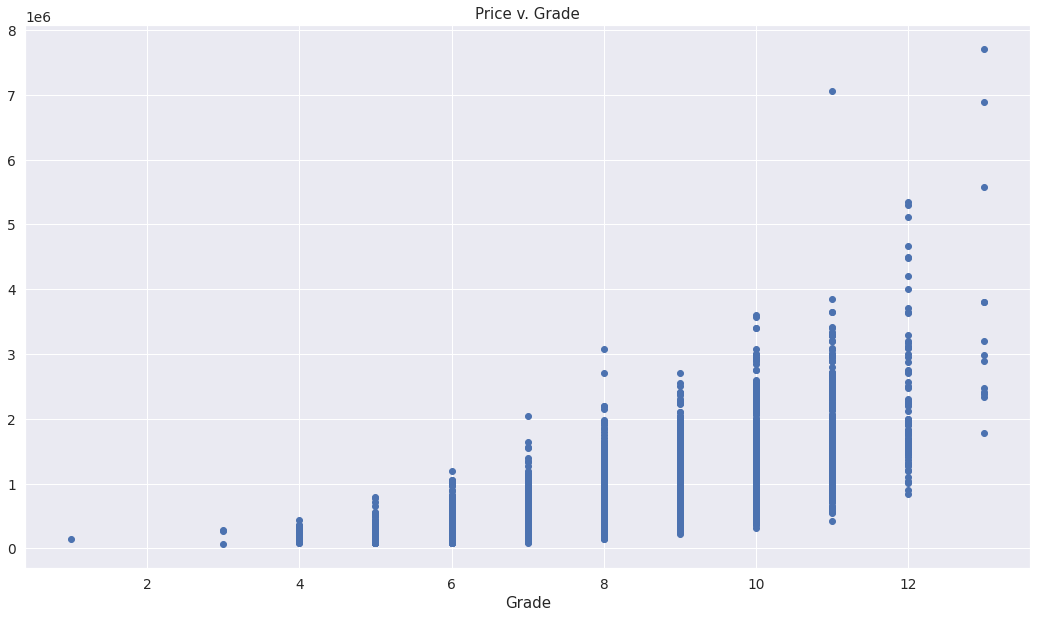

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(data['grade'],data['price'])
#plt.ylabel("Price")
plt.xlabel("Grade")
plt.title("Price v. Grade")


Text(0.5, 1.0, 'Price v. Year Built')

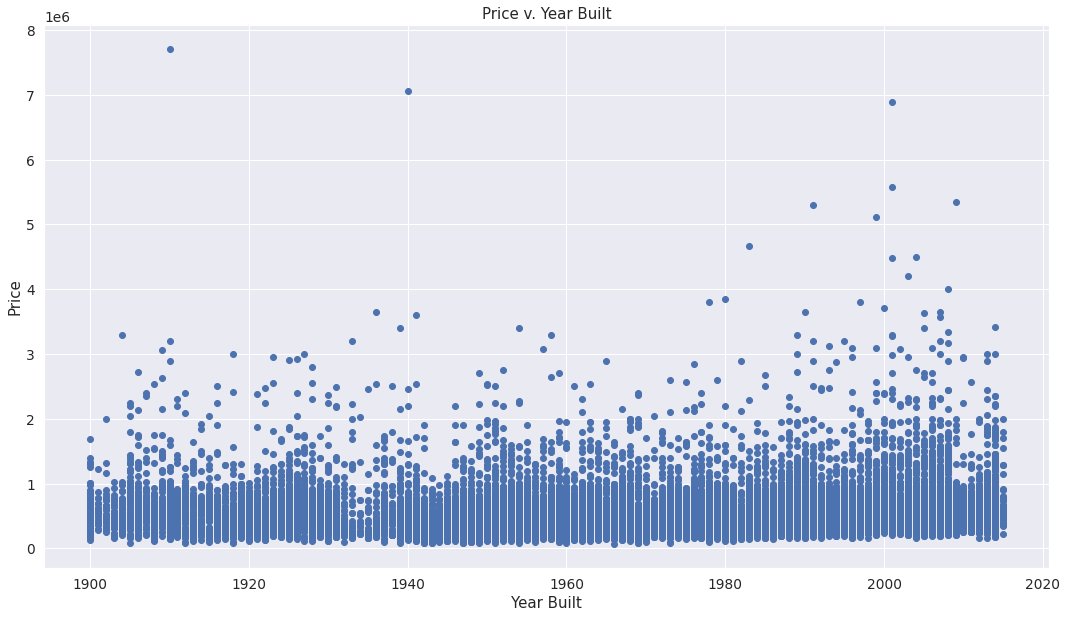

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(data['yr_built'],data['price'])
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Price v. Year Built")

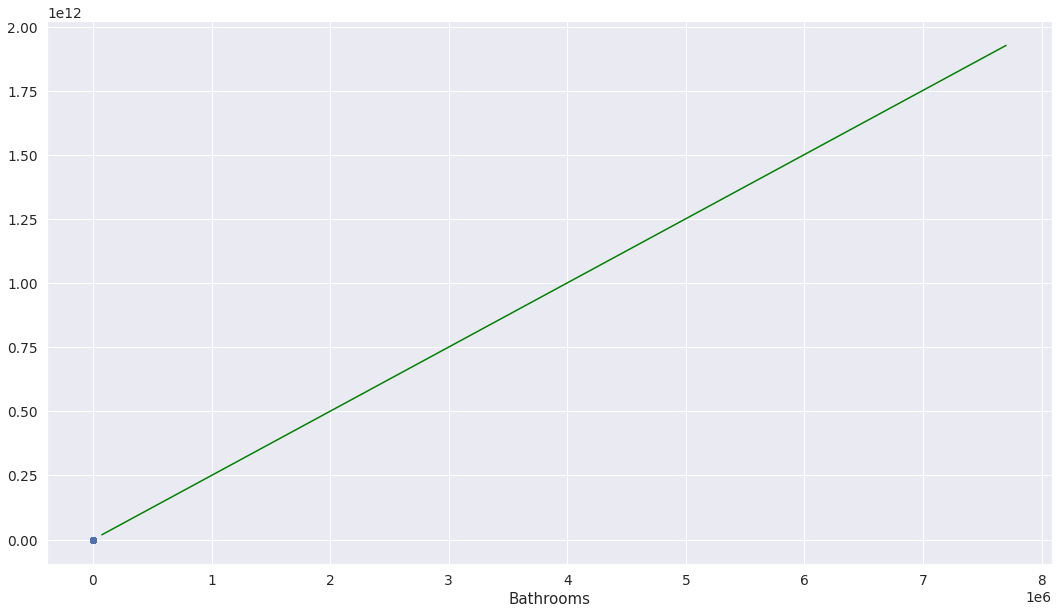

In [ ]:
plt.figure(figsize=(18,10))
#plt.title("Price v. Bathrooms")

plt.scatter(data['bathrooms'],data['price'])
#plt.ylabel("Price")
plt.xlabel("Bathrooms")
plt.plot(np.unique(data['price']), np.poly1d(np.polyfit(data['bathrooms'], data['price'], 1))(np.unique(data['price'])), color='green') #line of best fit



Text(0.5, 1.0, 'Bedrooms v. Price')

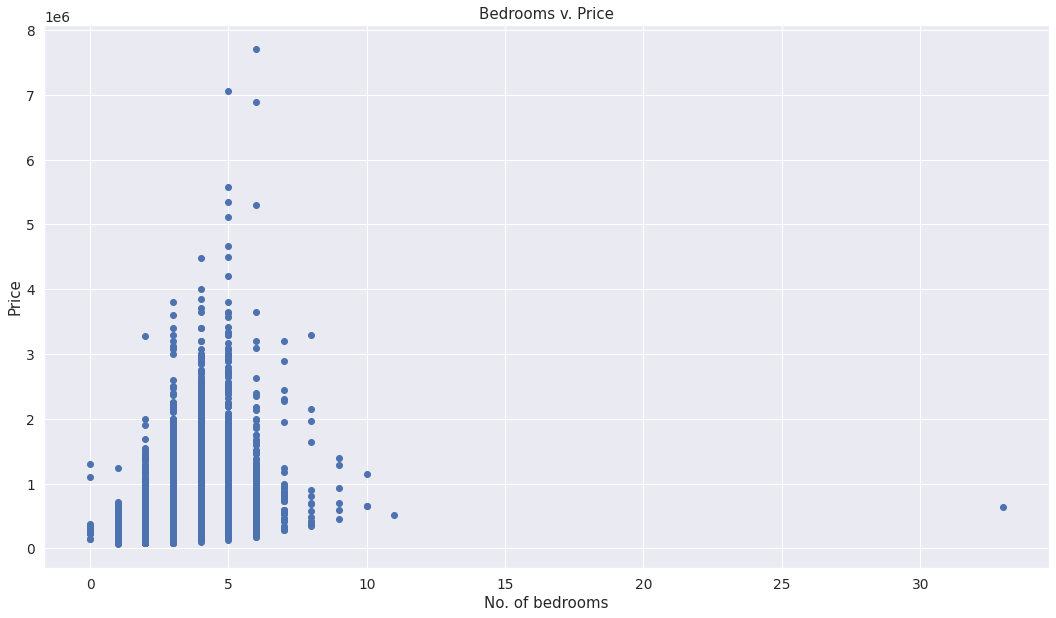

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(data['bedrooms'],data['price'])
plt.ylabel('Price')
plt.xlabel('No. of bedrooms')
plt.title('Bedrooms v. Price')

Text(0, 0.5, 'Price')

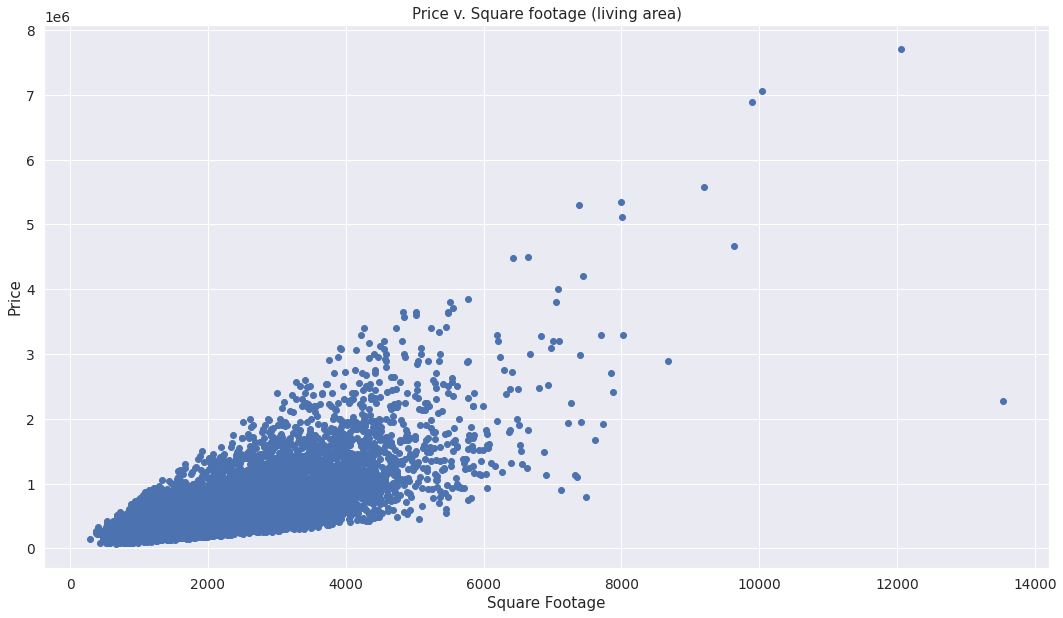

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(data['sqft_living'],data['price'])
plt.title('Price v. Square footage (living area)')
plt.xlabel('Square Footage')
plt.ylabel("Price")

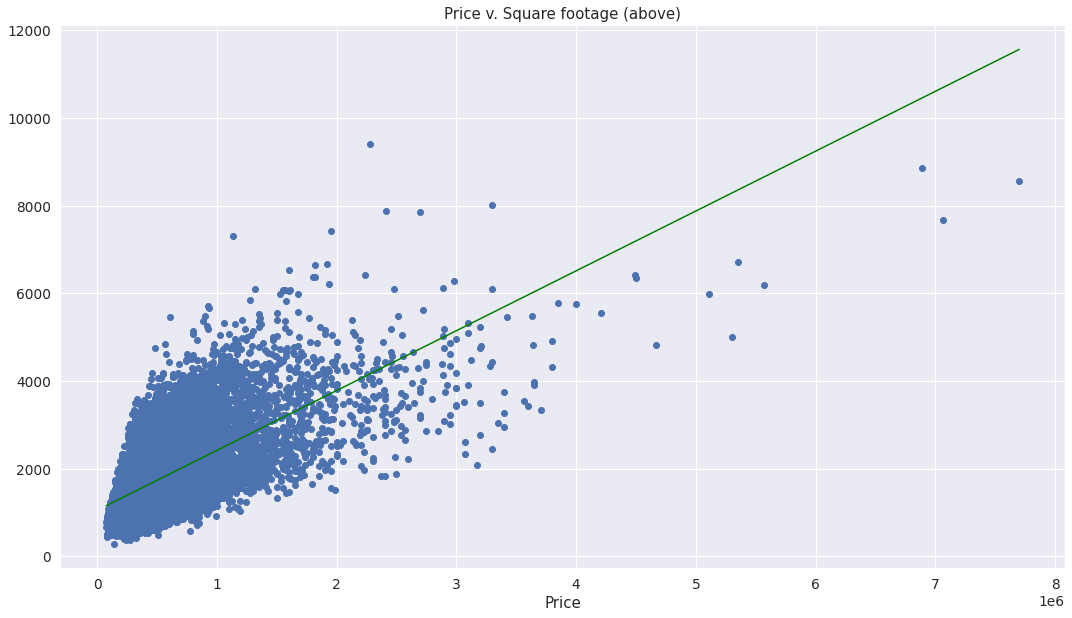

In [ ]:
plt.figure(figsize=(18,10))

plt.scatter(data['price'],data['sqft_above'])
plt.title('Price v. Square footage (above)')
#plt.ylabel('Square Footage')
plt.xlabel("Price")
plt.plot(np.unique(data['price']), np.poly1d(np.polyfit(data['price'], data['sqft_above'], 1))(np.unique(data['price'])), color='green') #line of best fit


### Joint Plot

The joint plot below was used to display a map-like diagram by ploting Latitude and Longitude to show the distribution of the houses across the area.

It was also used to show areas with a high density of houses.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function seaborn.utils.despine>

<Figure size 1296x720 with 0 Axes>

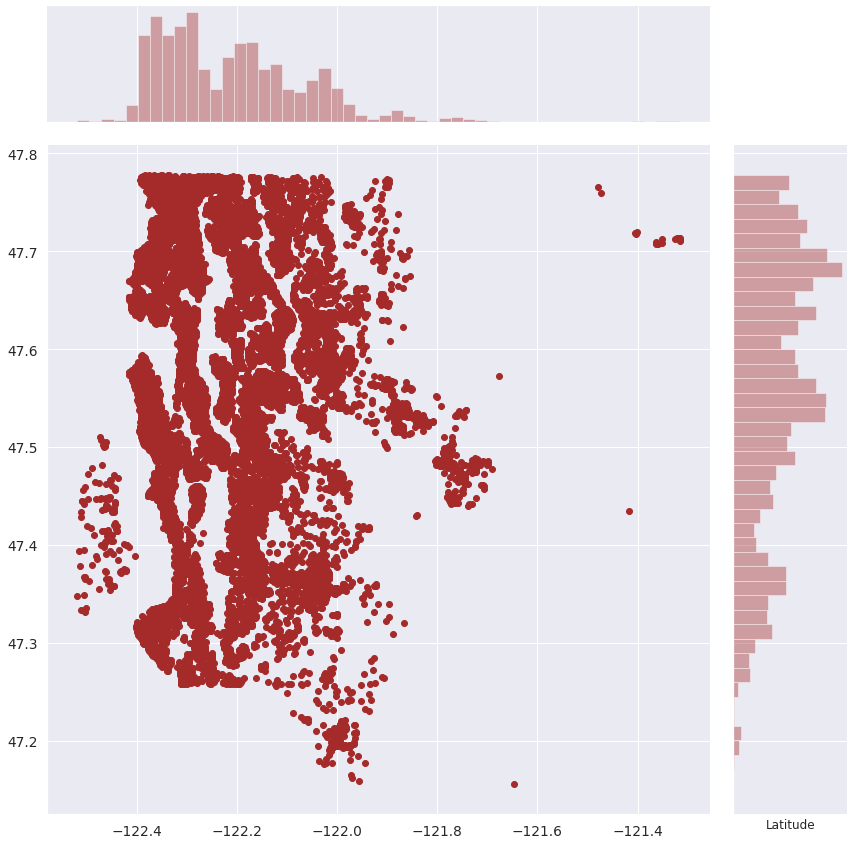

In [ ]:
plt.figure(figsize=(18,10))

sb.jointplot(y=data.lat.values, x=data.long.values, size=12,color='brown')
#plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
#plt.title("Concentration of Houses by Location")
sb.despine


![I plotted the same map on Tableau](https://i.imgur.com/q6BKhkA.png)

### Bar graph

The bar graph was used to compare the count of different number bedrooms in the distribution.

As seen, there is a house with 33 bedrooms which could be a potential outlier.

Text(0.5, 0, 'Number of bedrooms')

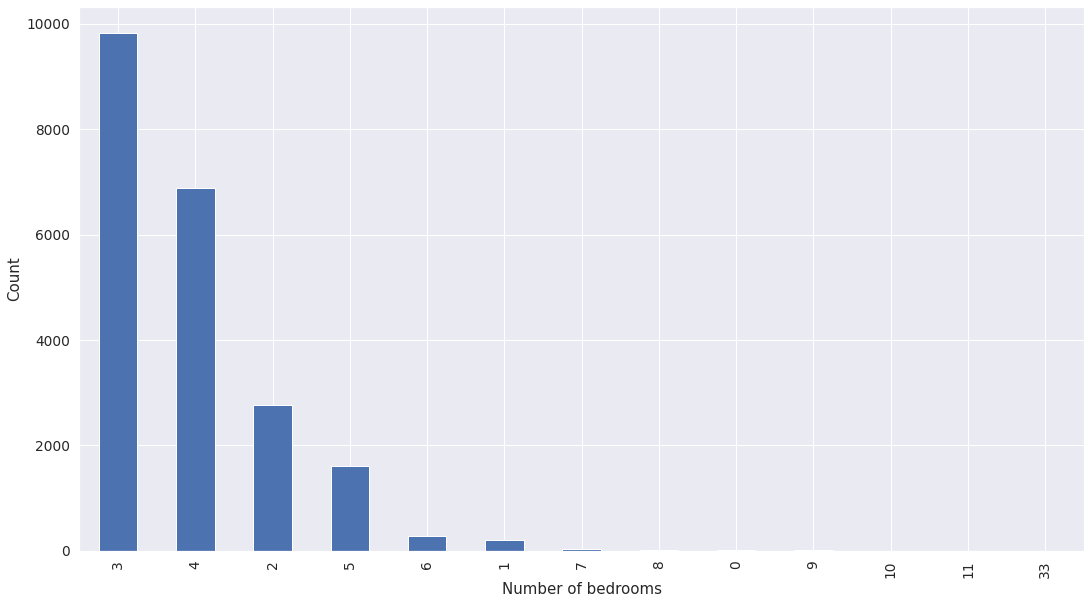

In [ ]:
plt.figure(figsize=(18,10))

data["bedrooms"].value_counts().plot(kind='bar')
#plt.title('Count vs bedrooms Bar Graph')
plt.ylabel("Count")
plt.xlabel('Number of bedrooms')

# Identifying and Droping Outliers
An outlier is an observation point that is distant from other observations.

Outliers  affect the mean and median of a distribution which in turn may affect the predictive model as it tries to fit the data for training.

## Identifying Outliers
Box plots, violin plots,  scatter plots, bar graphs and other statistical methods can be used to identify outliers.

Box plots were used in this case to identify the outliers as a simple and accurate method.

### Box Plots

{'boxes': [<matplotlib.lines.Line2D at 0x7fc12fdb7b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc12fdc55f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc12fdd0160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc12fdc5d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc12fdb7e48>,
  <matplotlib.lines.Line2D at 0x7fc12fdc5240>]}

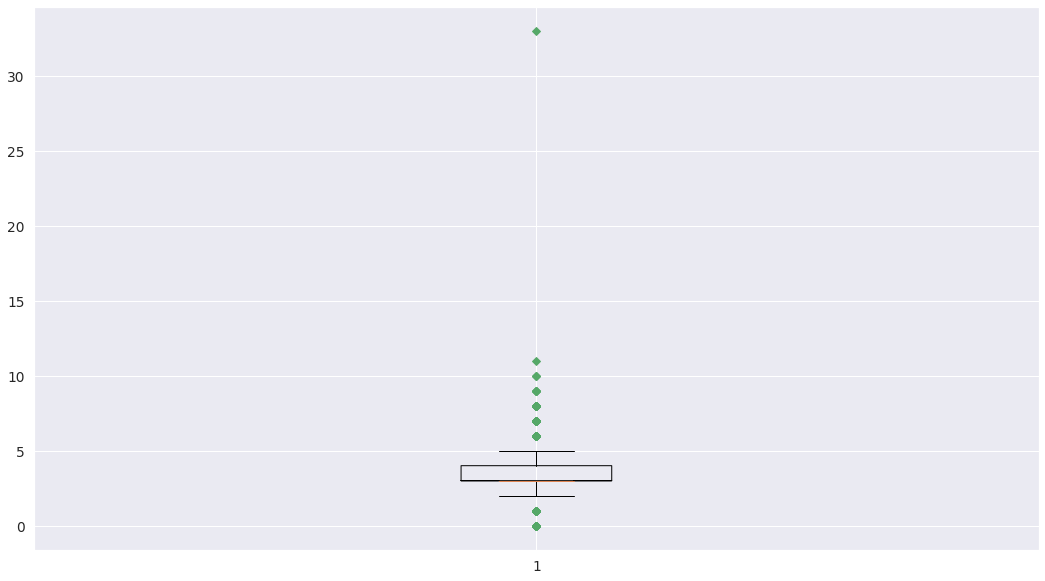

In [ ]:
plt.figure(figsize=(18,10))

plt.boxplot(data['bedrooms'],1,'gD')

In [ ]:
#count number of houses with more than ten bedrooms
data[data['bedrooms']>10].count()

id               2
date             2
price            2
bedrooms         2
bathrooms        2
sqft_living      2
sqft_lot         2
floors           2
waterfront       2
view             2
condition        2
grade            2
sqft_above       2
sqft_basement    2
yr_built         2
yr_renovated     2
zipcode          2
lat              2
long             2
sqft_living15    2
sqft_lot15       2
dtype: int64

In [ ]:
#locate house with 33 bedrooms
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


{'boxes': [<matplotlib.lines.Line2D at 0x7fc12fd24748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc12fd2f240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc12fd2fd68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc12fd2f9b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc12fd24a90>,
  <matplotlib.lines.Line2D at 0x7fc12fd24e48>]}

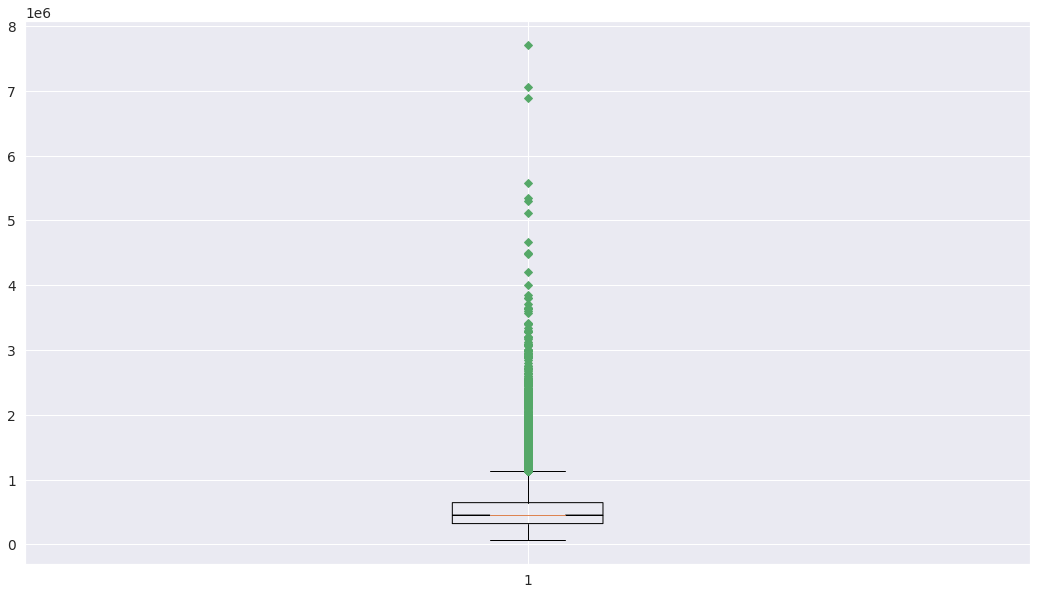

In [ ]:
plt.figure(figsize=(18,10))

plt.boxplot(data['price'],1,'gD')

In [ ]:
#count number of houses with prices above 7,000,000
data[data['price']>7000000].count()

id               2
date             2
price            2
bedrooms         2
bathrooms        2
sqft_living      2
sqft_lot         2
floors           2
waterfront       2
view             2
condition        2
grade            2
sqft_above       2
sqft_basement    2
yr_built         2
yr_renovated     2
zipcode          2
lat              2
long             2
sqft_living15    2
sqft_lot15       2
dtype: int64

In [ ]:
#locate houses with a value above 7,000,000
data.loc[data['price'] >= 7000000]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


### Droping Outliers

In [ ]:
data = data[data.bedrooms != 33]
data = data[data.price < 6000000]

# Probability Distribution and Normalization
A probability distribution is a device for indicating the values that a random variable may have.

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values. This in turn creates a normal distribution.

A normal distrution is a symmetric distribution where most of the observations cluster around the central peak and the mean, median, and mode of a normal distribution are almost equal therefore minimizing variance (deviation from the mean).

A normal distribution is important as it eases training of a machine learning model and provides eveness while sampling data.



## Probability distribution

Distribution plots are used to show a probality distribution.
For a normal distribution, the ideal skewness and kurtosis value is approximately 0.

Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.

Kurtosis  is used to describe the extreme values in one versus the other tail of a distribution.

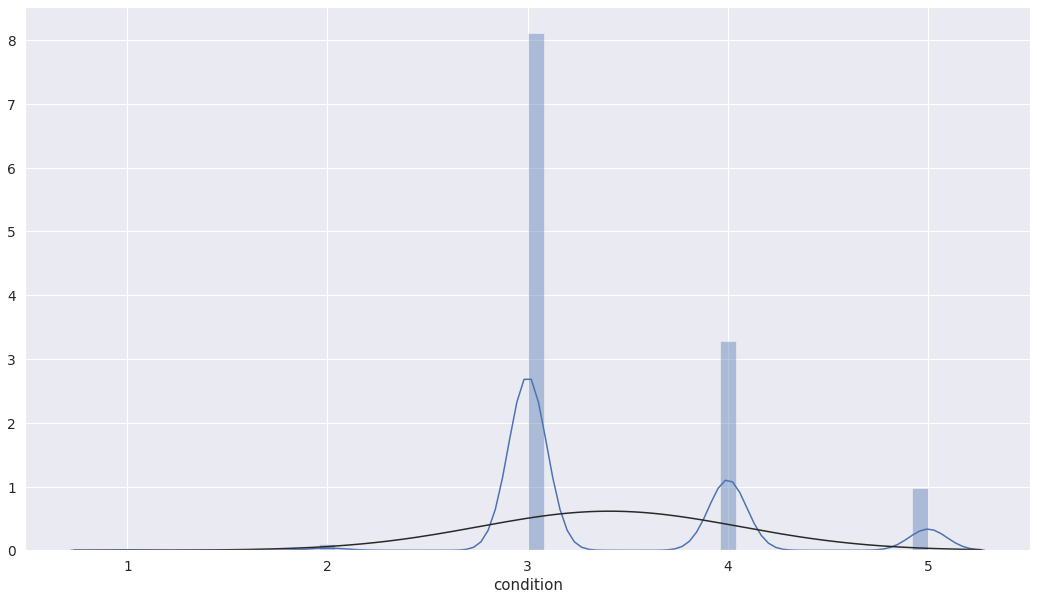

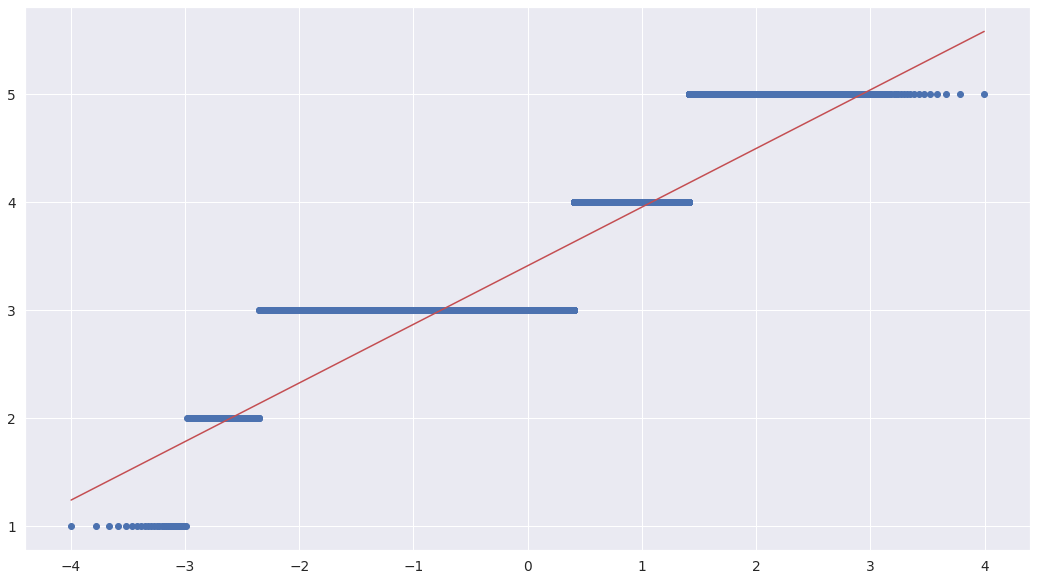

skewness: 1.032856
kurtosis: 0.526290


In [ ]:
plt.figure(figsize=(18,10))

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
sb.distplot(data.condition,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Condition Distribution');
(mu,sigma)= norm.fit(data['condition']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(data['condition'], plot=plt)
plt.show()

print("skewness: %f" % data['condition'].skew())
print("kurtosis: %f" % data ['condition'].kurt())

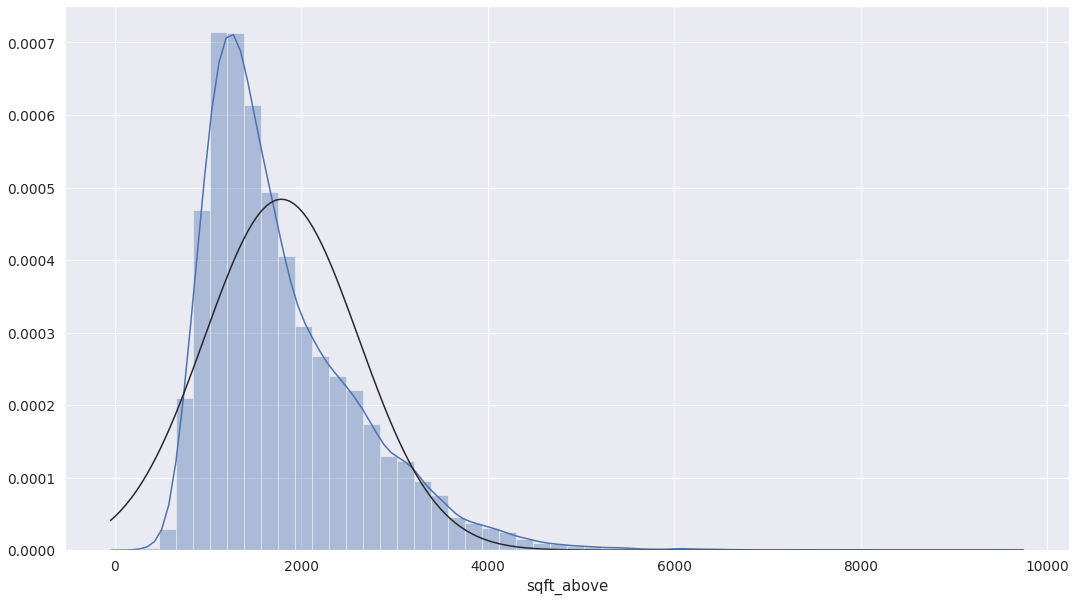

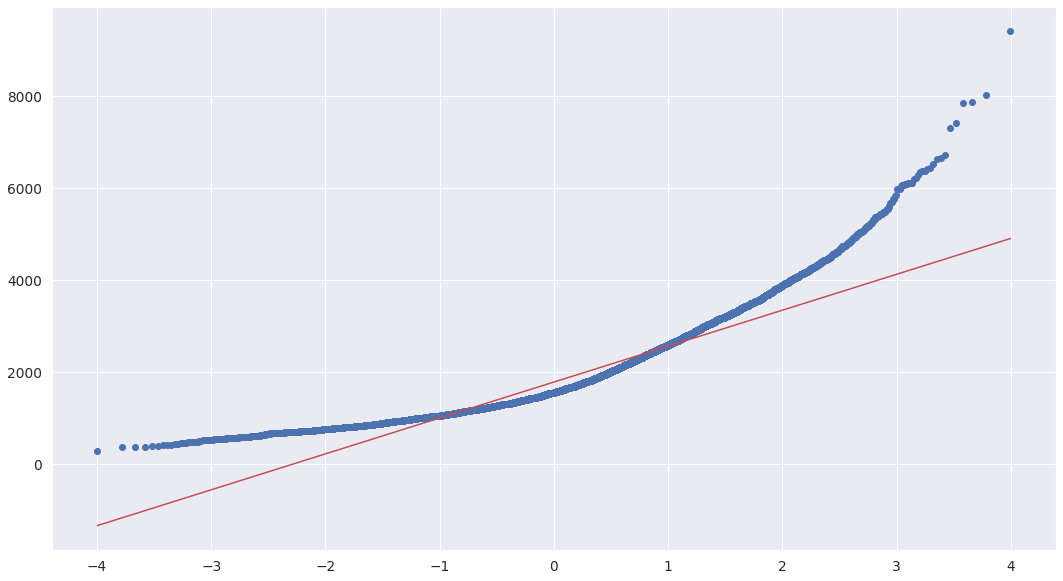

skewness: 1.397355
kurtosis: 2.938890


In [ ]:
plt.figure(figsize=(18,10))

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
sb.distplot(data.sqft_above,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Square Foot Above Distribution');
(mu,sigma)= norm.fit(data['sqft_above']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(data['sqft_above'], plot=plt)
plt.show()

print("skewness: %f" % data['sqft_above'].skew())
print("kurtosis: %f" % data ['sqft_above'].kurt())

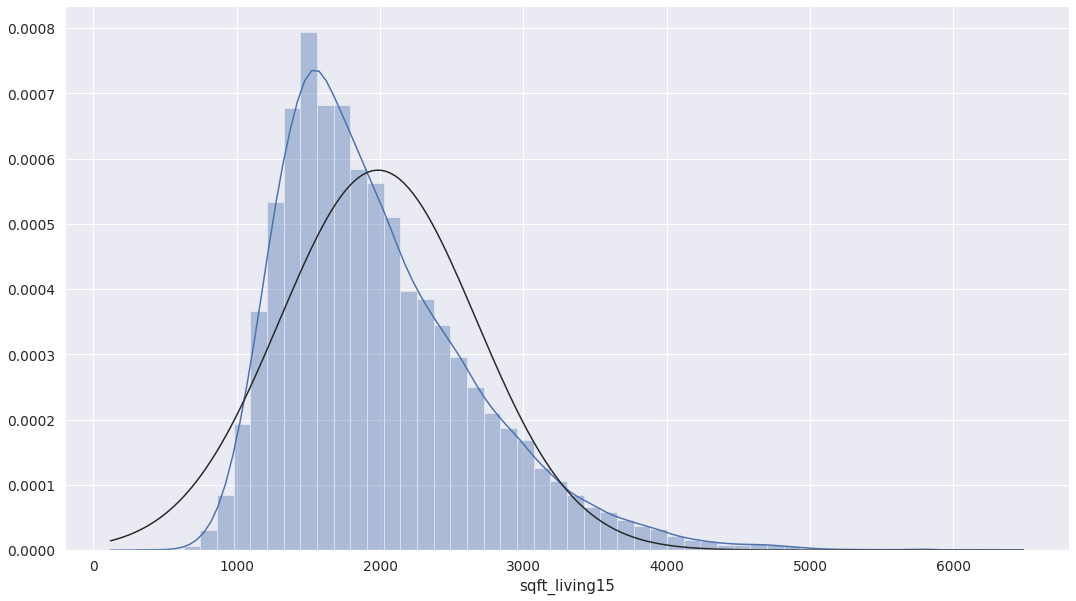

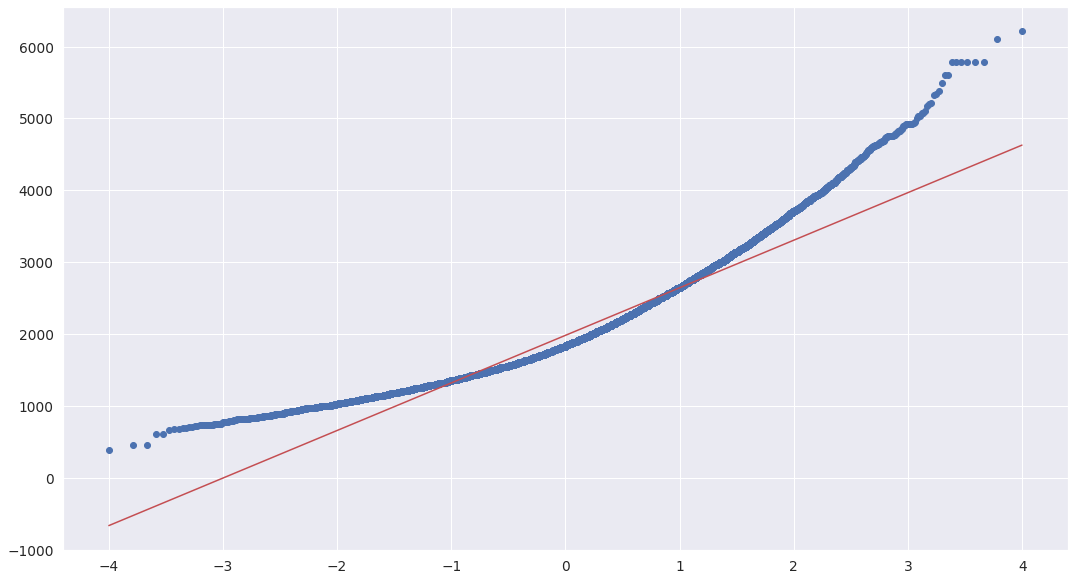

skewness: 1.107151
kurtosis: 1.596136


In [ ]:
plt.figure(figsize=(18,10))

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
sb.distplot(data.sqft_living15,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Square Foot Living(2015) Distribution');
(mu,sigma)= norm.fit(data['sqft_living15']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(data['sqft_living15'], plot=plt)
plt.show()

print("skewness: %f" % data['sqft_living15'].skew())
print("kurtosis: %f" % data ['sqft_living15'].kurt())

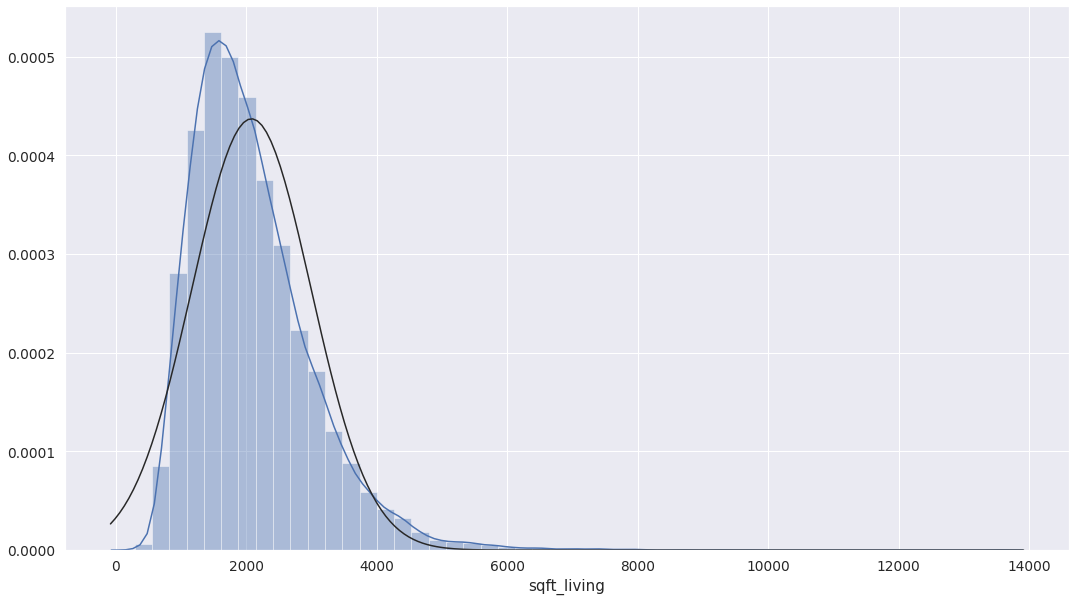

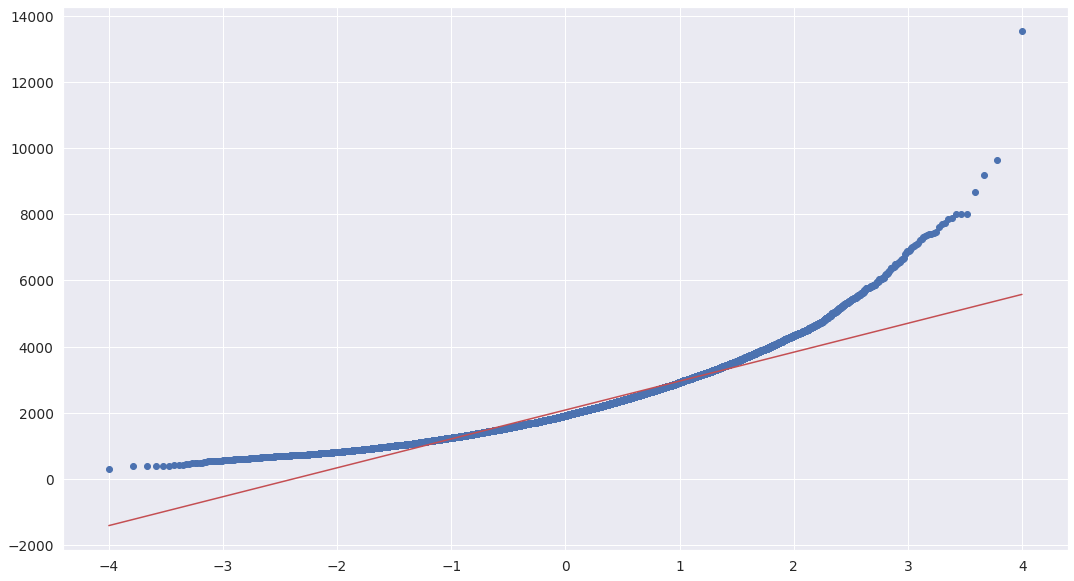

skewness: 1.382842
kurtosis: 4.280629


In [ ]:
plt.figure(figsize=(18,10))

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
sb.distplot(data.sqft_living,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Square Foot Living Distribution');
(mu,sigma)= norm.fit(data['sqft_living']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(data['sqft_living'], plot=plt)
plt.show()

print("skewness: %f" % data['sqft_living'].skew())
print("kurtosis: %f" % data ['sqft_living'].kurt())

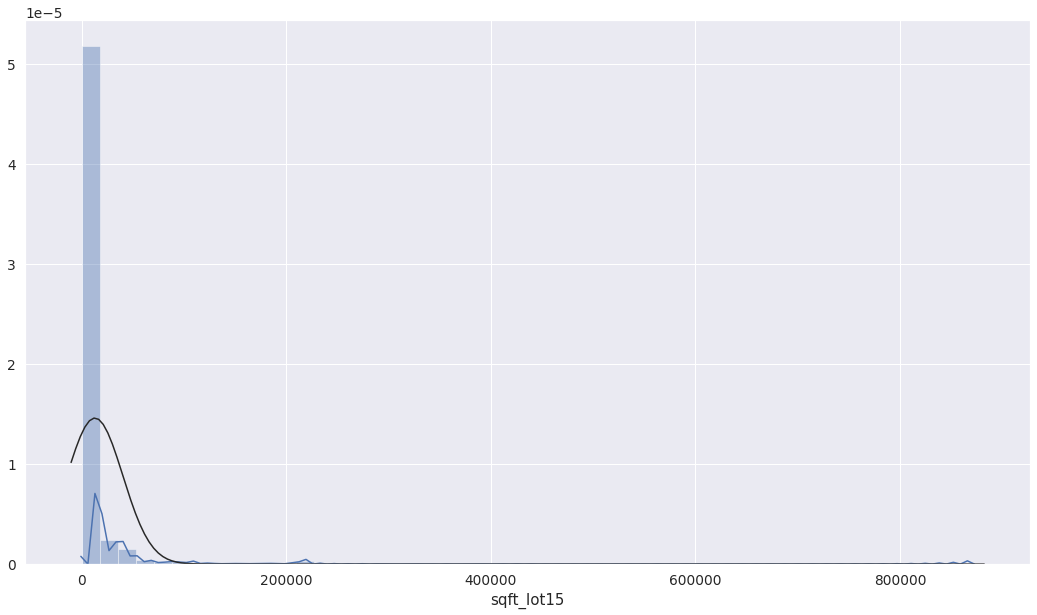

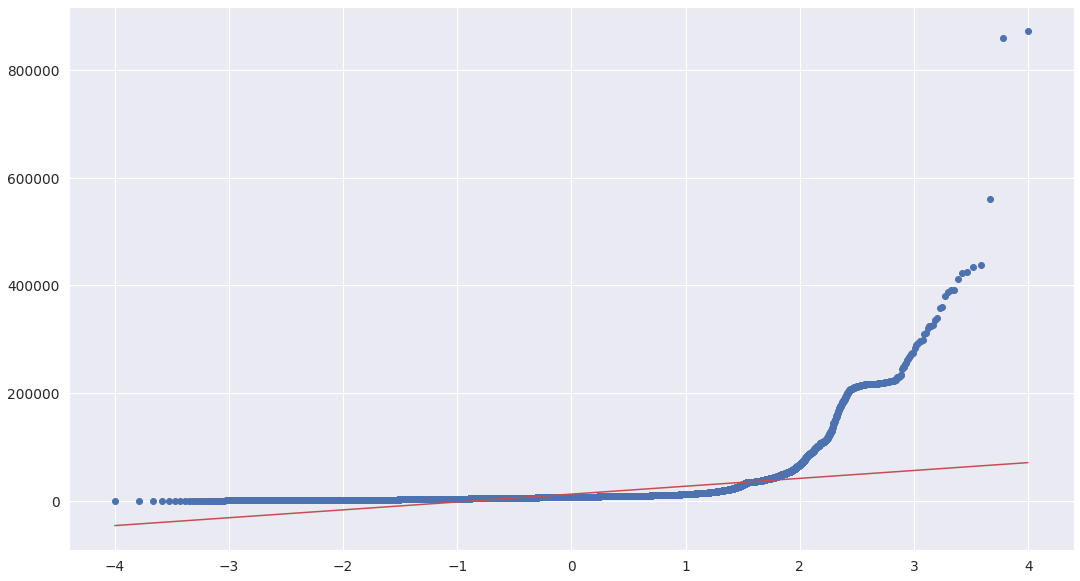

skewness: 9.506963
kurtosis: 150.758307


In [ ]:
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
plt.figure(figsize=(18,10))

sb.distplot(data.sqft_lot15,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Square Foot Lot(2015) Distribution');
(mu,sigma)= norm.fit(data['sqft_lot15']);

#QQ plot

plt.figure(figsize=(18,10))
res = stats.probplot(data['sqft_lot15'], plot=plt)
plt.show()

print("skewness: %f" % data['sqft_lot15'].skew())
print("kurtosis: %f" % data ['sqft_lot15'].kurt())

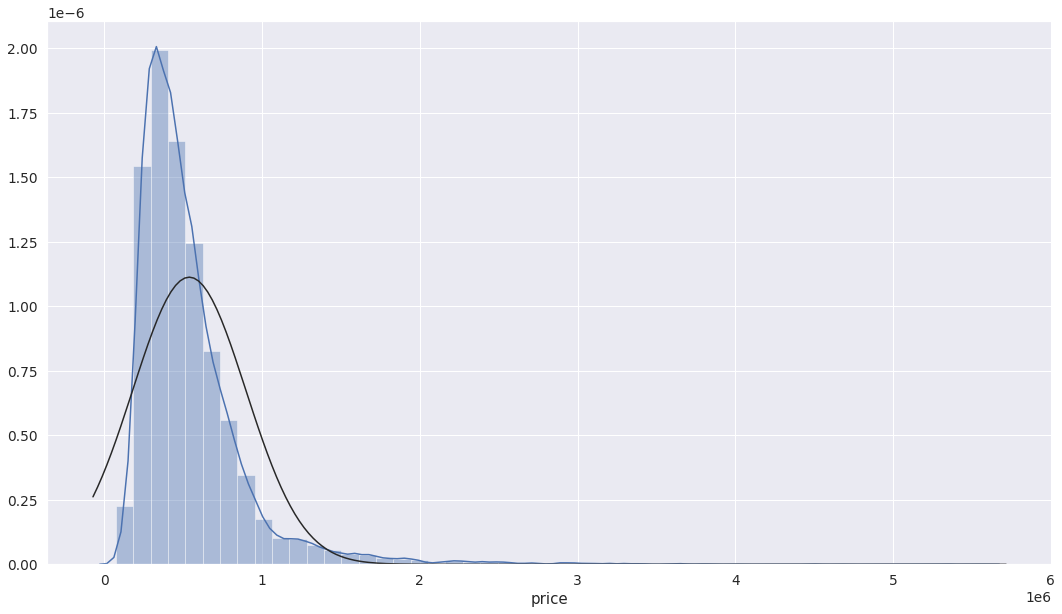

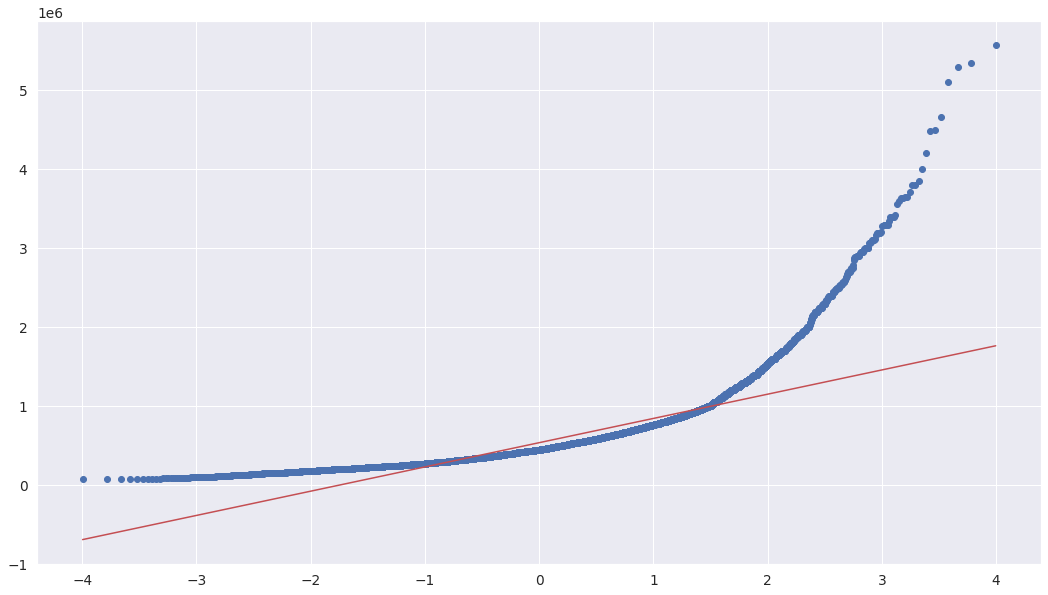

skewness: 3.423034
kurtosis: 21.370133


In [ ]:

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
# kernel density plot
plt.figure(figsize=(18,10))

sb.distplot(data.price,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Price Distribution');
(mu,sigma)= norm.fit(data['price']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(data['price'], plot=plt)
plt.show()


print("skewness: %f" % data['price'].skew())
print("kurtosis: %f" % data ['price'].kurt())

## Normalization

Various data transformation methods such as Box-Cox, arcsine, and log transformations can be used in normalization.

(Natural) log transformation is often used where the data has a positively skewed distribution and therefore was used to normalize columns that were highly skewed.



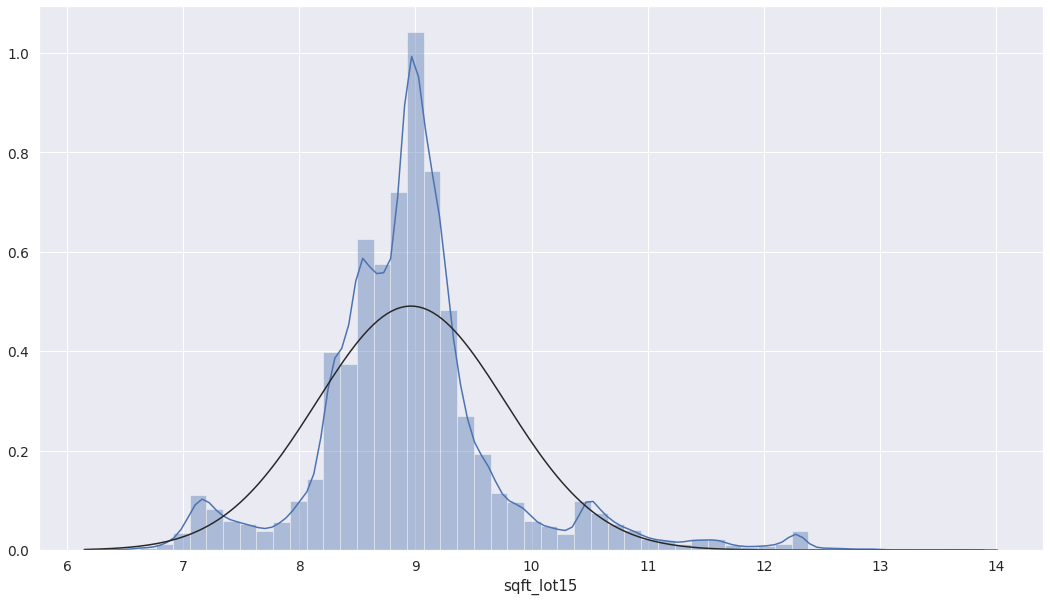

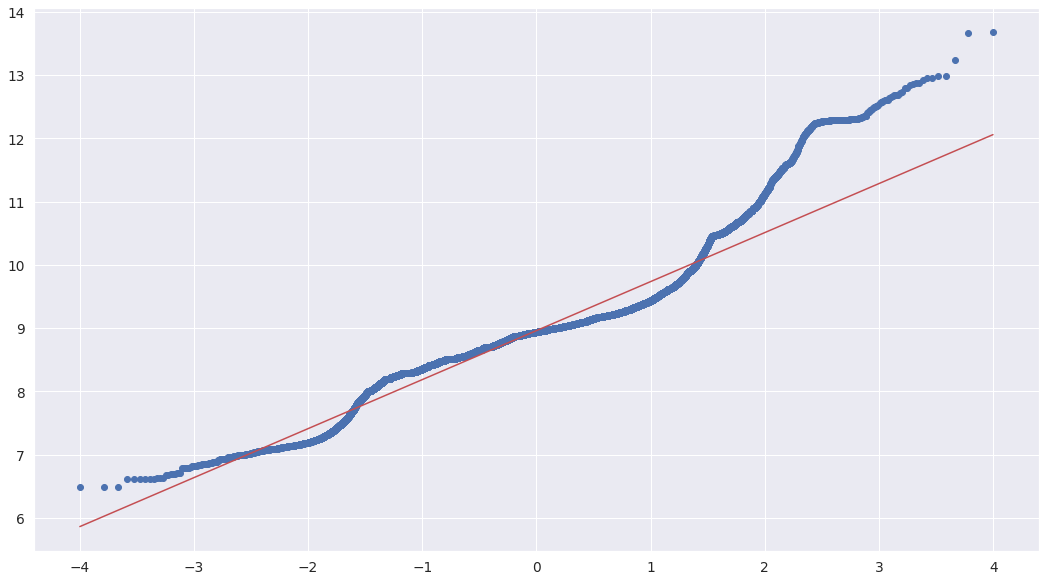

skewness: 0.967501
kurtosis: 3.564635


In [ ]:
plt.figure(figsize=(18,10))

#log transform the target 
data["sqft_lot15"] = np.log1p(data["sqft_lot15"])

#Kernel Density plot
sb.distplot(data.sqft_lot15,fit=norm);
plt.ylabel=('Frequency')
plt.title=('Square Foot Lot(2015) distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(data['sqft_lot15']);



#QQ plot
plt.figure(figsize=(18,10))

res =stats. probplot(data['sqft_lot15'], plot=plt)
plt.show()
print("skewness: %f" % data['sqft_lot15'].skew())
print("kurtosis: %f" % data['sqft_lot15'].kurt())

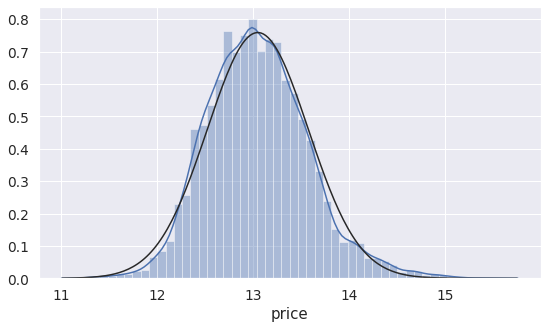

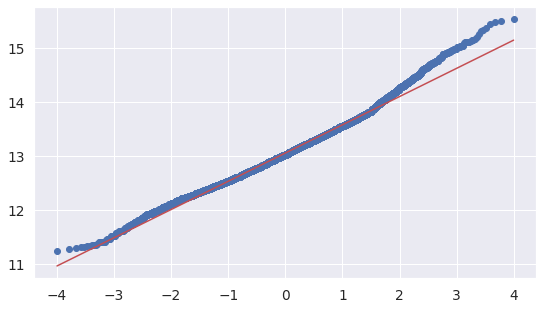

skewness: 0.412990
kurtosis: 0.617429


In [ ]:
#log transform the target 
data["price"] = np.log1p(data["price"])

#Kernel Density plot
plt.figure(figsize=(9,5))

sb.distplot(data.price,fit=norm);
plt.ylabel=('Frequency')
plt.title=('Price distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(data['price']);



#QQ plot
plt.figure(figsize=(9,5))
res =stats. probplot(data['price'], plot=plt)
plt.show()
print("skewness: %f" % data['price'].skew())
print("kurtosis: %f" % data['price'].kurt())

# Predictive Analytics

Predictive modeling in Machine Learning involves selection of the best algorithm that will be able to build a predictive model, with the highest accuracy and lowest loss, which will be able to predict the dependent variable given the independent variables.

A model is a representation of what an ML system has learned from the training data.

Loss is a measure of how far a model's predictions are from the actual value.

Linear Regression and Gradient Boosting Regression algoithms were both used in an attempt to build a model as the  value to be predicted is continous.

## **1. Linear Regression**

In [ ]:
data.shape

(21609, 21)

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Initialize Linear Regression to a variable reg

reg=LinearRegression()

In [ ]:
#Initialize the value to be predicted(label) as price

labels=data['price']

In [ ]:
labels

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21608    12.793862
21609    12.899222
21610    12.904461
21611    12.899222
21612    12.691584
Name: price, Length: 21609, dtype: float64

In [ ]:
#convert date into a readable data-type by the algorithm
#since the date variable had only 2014 and 2015, the date column can be trasformed into a nominal category with 1 representing 2014 and 0 representing 2015.

conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date']=conv_dates

In [ ]:
#drop columns not used in training.
#id, yr_built, condition and long (longitute) are droped because the have low corelation/significance on the target.
#price is also droped since it is not used as part of the independent variables.

train1 = data.drop(['id', 'price','condition','yr_built','long'],axis=1)


In [ ]:
train1.shape

(21609, 16)

### Cross Validation
Cross validation is a method of estimating how well a model will perform  on new data by testing the model against one or more non-overlapping data subsets withheld from the training set.

The dataset will be split into two, train and test sets,  where the model will be trained on the train set and its performance, accuracy and loss, tested on the test set.

In [ ]:
#70%, 30% train, test split

x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.3,random_state =5)


In [ ]:
#Fitting the regression algorithm with data from the train set.
#x_train represents the predictors (independent variables) and y_train represents the target.

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Testing our accuracy.
acc1=reg.score(x_test,y_test)
print(str("The accuracy of the model is: "+str("%.2f" %(acc1*100))+"%"))


The accuracy of the model is: 74.50%


In [ ]:
y_test.head()

4541     13.458837
14056    12.574185
2449     14.285515
18560    13.260386
13669    12.834684
Name: price, dtype: float64

### RMSE

RMSE (Root Mean Squared Error) is a square root of MSE.

MSE is the average squared loss per example. MSE is calculated by dividing the squared loss by the number of examples.

The square root is introduced to make scale of the errors to be the same as the scale of targets.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
y_prediction1 = reg.predict(x_test)

In [ ]:
RMSE_lin = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction1))

In [ ]:
print(RMSE_lin)

0.2655962003000965


## **2. Gradient Boosting Regressor**


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

In [ ]:
gbr=GradientBoostingRegressor(n_estimators= 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.08, loss = 'ls')

In [ ]:
train2 = data.drop(['id', 'price','condition','yr_built','long'],axis=1)

#70%, 30% train, test split

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(train2 , labels , test_size = 0.3,random_state =5)


In [ ]:
gbr.fit(x_train1,y_train1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
acc=gbr.score(x_test1,y_test1)
acc

0.8887790660461895

In [ ]:
acc2=("%.2f" % (acc*100))
acc2

'88.88'

In [ ]:
print(str("The acccuracy of the model is: "+str(acc2)+"%"))

The acccuracy of the model is: 88.88%


### **Feature Importance**
Feature importance shows significance of predictors of variables on the target after training using GBR.

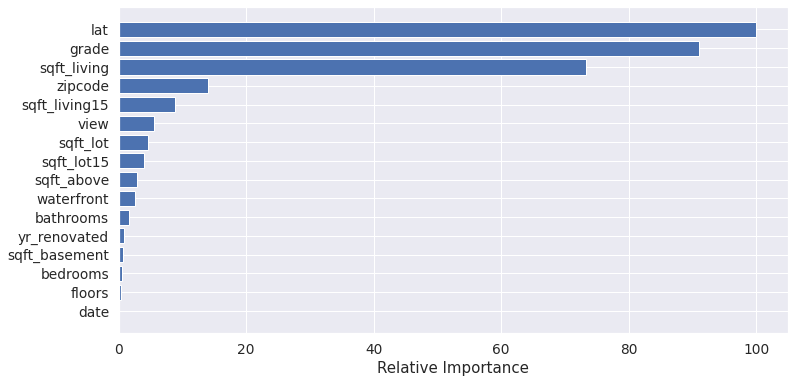

In [ ]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
#plt.title('Feature Importance')
plt.show()

### **RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
y_prediction = gbr.predict(x_test1)

In [ ]:
y_prediction

array([13.29817794, 12.73147724, 14.24396086, ..., 12.34287421,
       12.63041511, 12.43101581])

In [ ]:
RMSE_gbr = sqrt(mean_squared_error(y_true = y_test1, y_pred = y_prediction))

In [ ]:
print(RMSE_gbr)

0.17539339541181842
